# 과제
1. 회귀(Regression)
- Dataset : NYC_taxi.csv
- 거리에 따른 택시요금 예측
- 조건) 뉴욕시 내에서 승차/하차의 경우만
2. 분류(Classification)
- Dataset : diabetes.csv
- 당뇨 발생 여부
- 조건) 당뇨병 발병 확률이 XX%입니다.

In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
# %pip install -U scikit-learn

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

### 오차 확인 -> sklearn.metrics의 mean_absolute_error, mean_squared_error 사용

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# preY = model.predict(arrx)
# mae = mean_absolute_error(arry, preY)
# mse = mean_squared_error(arry, preY)

# print(mae, mse)

### 1. 데이터 로딩

In [67]:
df = pd.read_csv('../home/data/train2.csv',nrows=5000, parse_dates=['pickup_datetime'], index_col=0)
df.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2


In [68]:
df.info()
df.drop('key', axis=1, inplace=True)  # 필요없는 컬럼 제거

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                5000 non-null   object             
 1   fare_amount        5000 non-null   float64            
 2   pickup_datetime    5000 non-null   datetime64[ns, UTC]
 3   pickup_longitude   5000 non-null   float64            
 4   pickup_latitude    5000 non-null   float64            
 5   dropoff_longitude  5000 non-null   float64            
 6   dropoff_latitude   5000 non-null   float64            
 7   passenger_count    5000 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 351.6+ KB


### 2. 결측치 및 이상치 체크

In [69]:
df.isnull().sum()
print(df.describe())

       fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  5000.000000       5000.000000      5000.000000        5000.000000   
mean     11.296238        -72.426826        39.867237         -72.426130   
std       9.710106         10.722381         6.351342          10.722293   
min      -2.900000        -74.438233       -73.991840         -74.429332   
25%       6.000000        -73.992449        40.734045         -73.991349   
50%       8.500000        -73.982069        40.752128         -73.980196   
75%      12.500000        -73.967040        40.766890         -73.963589   
max     180.000000         40.751582        41.366138          40.758867   

       dropoff_latitude  passenger_count  
count       5000.000000      5000.000000  
mean          39.875767         1.631000  
std            6.326084         1.257122  
min          -73.979010         0.000000  
25%           40.734379         1.000000  
50%           40.753512         1.000000  
75%           

### 거리 컬럼 생성

In [70]:
df['distance'] = ((df['pickup_longitude']- df['dropoff_longitude'])**2 + (df['pickup_latitude']- df['dropoff_latitude'])**2)**(1/2)
df.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470
5,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1,0.038675
6,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1,0.014565
7,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1,0.045146
8,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1,0.014258
9,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2,0.026593


In [71]:
pickup = list(zip(df['pickup_latitude'], df['pickup_longitude']))

### 위도, 경도 -> 주소 추출

In [66]:
# %pip install -U googlemaps

import googlemaps
from datetime import datetime

gmaps = googlemaps.Client(key='본인 키 입력')

# Geocoding an address
# geocode_result = gmaps.geocode('1600 Amphitheatre Parkway, Mountain View, CA')

# Look up an address with reverse geocoding
reverse_geocode_result = gmaps.reverse_geocode((40.714224, -73.961452))

print(reverse_geocode_result[0]['formatted_address'])

277 Bedford Ave, Brooklyn, NY 11211, USA


In [73]:
# 출발지의 위도,경도 -> 주소 불러오기
pickup_addr = []
for loca in pickup:
    reverse_geocode_result = gmaps.reverse_geocode(loca)
    try:
        pickup_addr.append(reverse_geocode_result[0]['formatted_address'])
        print(reverse_geocode_result[0]['formatted_address'])
    except Exception as e:
        pickup_addr.append("")

10737 71st Ave, Forest Hills, NY 11375, USA
397 South End Ave, New York, NY 10280, USA
137 W 50th St, New York, NY 10020, USA
3 Av, New York, NY 10003, USA
773 Madison Ave, New York, NY 10065, USA
Golden Swan Garden, West 4th Street, New York, NY 10012, USA
295 Madison Ave, New York, NY 10017, USA
1576 1st Ave., New York, NY 10028, USA
74 Charlton St, New York, NY 10014, USA
468 E 18th St, New York, NY 10003, USA
60 W 14th St, New York, NY 10011, USA
769 6th Ave, New York, NY 10001, USA
207 Varick St, New York, NY 10014, USA
234 W 12th St, New York, NY 10014, USA
234 W 48th St, New York, NY 10036, USA
393 2nd Ave, New York, NY 10010, USA
254 Central Park West, New York, NY 10024, USA
287 Madison Ave, New York, NY 10017, USA
334 5th Ave, New York, NY 10001, USA
1010 Park Avenue at, E 85th St, New York, NY 10028, USA
600 W 57th St, New York, NY 10019, USA
9 Ave/W 25 St, New York, NY 10001, USA
845 3rd Ave, New York, NY 10022, USA
554 8th Ave, New York, NY 10018, USA
327 W 46th St, New Yo

In [87]:
# 출발지의 주소에서 NY(뉴욕) 주소를 가진 레코드만 추출하기
df['pickup_addr'] = pickup_addr
df = df.loc[df['pickup_addr'].str.contains('NY'),:]

In [88]:
dropoff = list(zip(df['dropoff_latitude'], df['dropoff_longitude']))

In [90]:
# 도착지의 위도,경도 -> 주소 불러오기
dropoff_addr = []
for loca in dropoff:
    reverse_geocode_result = gmaps.reverse_geocode(loca)
    try:
        dropoff_addr.append(reverse_geocode_result[0]['formatted_address'])
        print(reverse_geocode_result[0]['formatted_address'])
    except Exception as e:
        dropoff_addr.append("")

144 Puritan Ave, Forest Hills, NY 11375, USA
364 Amsterdam Ave, New York, NY 10024, USA
1 Pennsylvania Plaza FRNT 7, New York, NY 10119, USA
350 W 43rd St, New York, NY 10036, USA
1263 Madison Ave, New York, NY 10128, USA
Park Ave, E 52nd St, New York, NY 10022, USA
5 Av/59 St, 1-5 E 59th St, New York, NY 10022, USA
450 Fashion Ave #2901, New York, NY 10123, USA
40 E 9th St, New York, NY 10003, USA
350 W 43rd St, New York, NY 10036, USA
298 1st Ave., New York, NY 10009, USA
440 Park Ave S, New York, NY 10016, USA
212 Broadway, New York, NY 10038, USA
81 Spring St, New York, NY 10012, USA
220 Park Ave S, New York, NY 10003, USA
3959 Broadway Suite Chn701, New York, NY 10032, New York, NY 10003, USA
1080 5th Ave #1C, New York, NY 10128, USA
5 Av/W 44 St, New York, NY 10036, USA
1330 6th Ave, New York, NY 10019, USA
425 E 58th St, New York, NY 10022, USA
871 8th Ave, New York, NY 10019, USA
East 23 St & Park Av, New York, NY 10010, USA
1251 Ave of the Americas, New York, NY 10020, USA
91 

In [93]:
# 도착지의 주소에서 NY(뉴욕) 주소를 가진 레코드만 추출하기
df['dropoff_addr'] = dropoff_addr

df = df.loc[df['dropoff_addr'].str.contains('NY'),:]

C:\Users\wng37\AppData\Local\Temp\ipykernel_17540\121833721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dropoff_addr'] = dropoff_addr


In [98]:
# 레코드 개수 확인
len(df)

4866

In [95]:
# 사용할 데이터 지정
data = df[['distance']]
fare = df['fare_amount']

In [96]:
# 샘플 나누기
train_data, test_data, train_fare, test_fare = train_test_split(data, fare, random_state=42)

# 선형회귀 시작
lr = LinearRegression()
lr.fit(train_data, train_fare)

LinearRegression()

In [101]:
# 선형회귀 점수
print(lr.score(train_data, train_fare))
print(lr.score(test_data, test_fare))
print(lr.coef_, lr.intercept_)

0.7883669313005459
0.7858317285189098
[207.7550366] 4.1056221041729195


## 그래프 그리기(선형회귀선 포함)

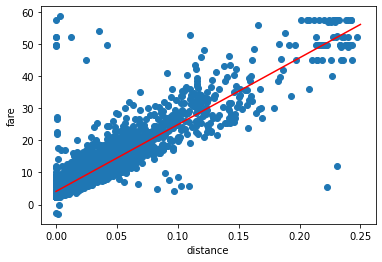

In [105]:
plt.scatter(train_data, train_fare)
plt.plot([0,0.25], [0*lr.coef_[0]+lr.intercept_ , 0.25*lr.coef_[0]+lr.intercept_], c='red')
plt.xlabel('distance')
plt.ylabel('fare')
plt.show()

## 2. 당뇨병
- Dataset : diabetes.csv
- 당뇨 발생 여부
- 조건) 당뇨병 발병 확률이 XX%입니다.

In [10]:
# 로지스틱 회귀를 사용하자
diab = pd.read_csv('../home/data/diabetes.csv')
diab.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [25]:
data = diab.iloc[:,0:8]
target = diab.iloc[:,8]

In [26]:
train_data, test_data, train_target, test_target =train_test_split(data, target, random_state=42)

Lor = LogisticRegression(max_iter=3000)
Lor.fit(train_data, train_target)

LogisticRegression(max_iter=3000)

In [27]:
print(Lor.score(train_data, train_target))
print(Lor.score(test_data, test_target))
print(f'class: {Lor.classes_}')
print(f'train data의 예측값: {Lor.predict_proba(train_data)}')
print(f'test data의 예측값: {Lor.predict_proba(test_data)}')

0.78125
0.7239583333333334
class: [0 1]
train data의 예측값: [[0.09302545 0.90697455]
 [0.78032684 0.21967316]
 [0.92112237 0.07887763]
 ...
 [0.34388042 0.65611958]
 [0.21478138 0.78521862]
 [0.94231387 0.05768613]]
test data의 예측값: [[0.72812239 0.27187761]
 [0.80754375 0.19245625]
 [0.88916879 0.11083121]
 [0.85489122 0.14510878]
 [0.51653373 0.48346627]
 [0.55069429 0.44930571]
 [0.98600695 0.01399305]
 [0.3875822  0.6124178 ]
 [0.43282162 0.56717838]
 [0.21115798 0.78884202]
 [0.74271837 0.25728163]
 [0.08640158 0.91359842]
 [0.63088881 0.36911119]
 [0.72656844 0.27343156]
 [0.92821463 0.07178537]
 [0.63297111 0.36702889]
 [0.86657001 0.13342999]
 [0.92935195 0.07064805]
 [0.13059518 0.86940482]
 [0.42786639 0.57213361]
 [0.79449304 0.20550696]
 [0.92449932 0.07550068]
 [0.45615196 0.54384804]
 [0.90744653 0.09255347]
 [0.44886841 0.55113159]
 [0.10099876 0.89900124]
 [0.87733773 0.12266227]
 [0.96962887 0.03037113]
 [0.7387866  0.2612134 ]
 [0.89168324 0.10831676]
 [0.08337522 0.916624

In [28]:
from scipy.special import expit
# 당뇨병의 양성 확률을 Proba 컬럼으로 추가
train_data['Proba'] = expit(Lor.decision_function(train_data))

In [36]:
train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Proba
357,13,129,0,30,0,39.9,0.569,44,0.906975
73,4,129,86,20,270,35.1,0.231,23,0.219673
352,3,61,82,28,0,34.4,0.243,46,0.078878
497,2,81,72,15,76,30.1,0.547,25,0.049868
145,0,102,75,23,0,0.0,0.572,21,0.004504


### 그래프 보기

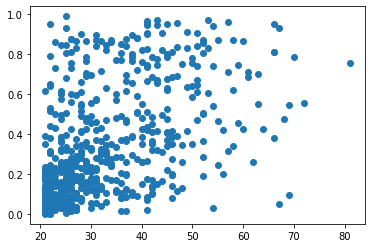

In [35]:
plt.scatter(train_data['Age'], train_data['Proba'])
plt.show()